# (Ford go bike trip data)
## by (Mohammed A. Yassin)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# loading data
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# overview of the data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [42]:
# shape of data (rows,columns)
df.shape

(183412, 16)

In [4]:
# info about data its type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# see the statistics of data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# making a copy
df_1= df.copy()

In [7]:
# see if there's null values
df_1.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# see if there's duplicate data
df_1.duplicated().sum()

0

In [9]:
# removing unuseful columns
df_1.drop(['start_station_id','end_station_id'],axis=1,inplace = True)

In [10]:
#removing null data
df_1.dropna(inplace = True)

In [11]:
# see if there's null data to make sure the previous code has worked
df_1.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
# see how many bike id
df_1['bike_id'].nunique()

4607

In [13]:
#change type of start time from string to datetime
df_1['start_time']= pd.to_datetime(df['start_time'])

In [14]:
# change type of end time from string to datetime
df_1['end_time']= pd.to_datetime(df['end_time'])

In [15]:
# make sure of our changes
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  int64         
 10  user_type                174952 non-null  object        
 11  member_birth_year        174952 non-null  float64       
 12  member_gender   

In [16]:
# making new column for day of week from start time 
df_1['day']= df_1['start_time'].dt.day_name()
df_1.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,Thursday


In [17]:
# review for our data shape
df_1.shape

(174952, 15)

In [18]:
# review for our data info
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  int64         
 10  user_type                174952 non-null  object        
 11  member_birth_year        174952 non-null  float64       
 12  member_gender   

In [19]:
# review for our data statistics
df_1.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,1659.195937,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> the data cosists of 15 columns (duration_sec,bike_id,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day) and 174952 rows there are 4607 bike most variable are numeric except , start time and end time wich are time data|'start station name' ,     'end station name',day are strings| 'user type','member gender' and 'bike share for all trip' ordered variable

### What is/are the main feature(s) of interest in your dataset?

> the most interesting feature is duration of trip and its relation with day gender and user type 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the duration will be more in weekend (Saturday and Sunday) also I think male will have more duration trip and subscribers

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

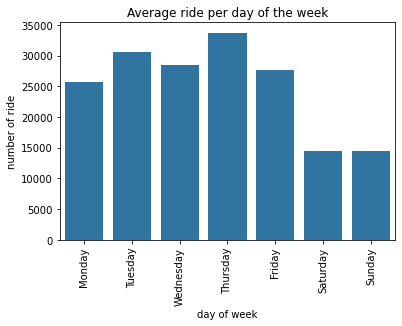

In [20]:
# making a countplot for the trip in each day of week 
fig, ax = plt.subplots();
color_b=sns.color_palette()[0]
order_day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data=df_1,x='day',color=color_b,order=order_day);
plt.xticks(rotation=90);
plt.xlabel('day of week')
plt.ylabel('number of ride')
plt.title('Average ride per day of the week');

> Unlike what I was expecting the weekend day has the lowest number of people who ride bike wich maybe due to use of bike for going to work or schools 

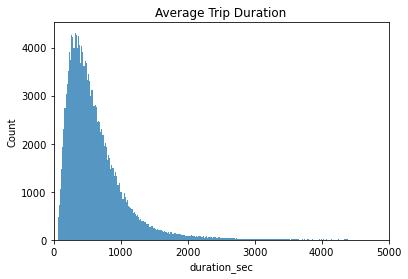

In [21]:
# making a histplot for seeing distribution for duration of trips in our data
fig, ax = plt.subplots();
sns.histplot(data = df_1,x='duration_sec')
ax.set_xlim(0,5000);
plt.title('Average Trip Duration');

## most bike duration are arount 600-800 seconds

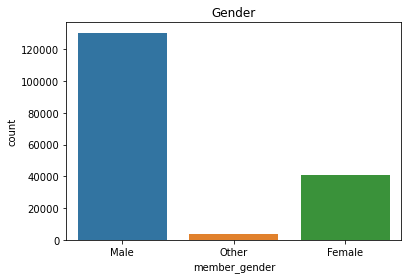

In [22]:
# making a function for countplot
def countplot(d,s,a):
    sns.countplot(data=d,x=s);
    plt.title(a);
# making a count plot for trips for each gender
countplot(df_1,'member_gender','Gender')

#### As I expected male will be more the female 

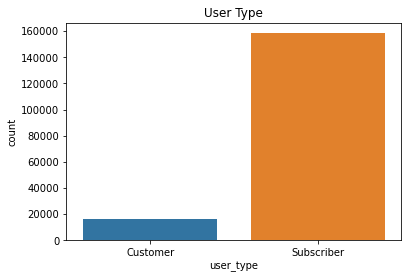

In [23]:
# making a count plot for trips for each user type
countplot(df_1,"user_type","User Type")

#### As I expected subscriber will be more the customer

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> most of distribution goes as I expected except for the days of the week which has shown that the weekend has the lowest number of ride , Also the duration of trip was between 600- 800 second ie 10-13 min which indicates that most trip maybe to near workplace or schools 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> no the data were tidy as I have already wrangled it before visualization

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

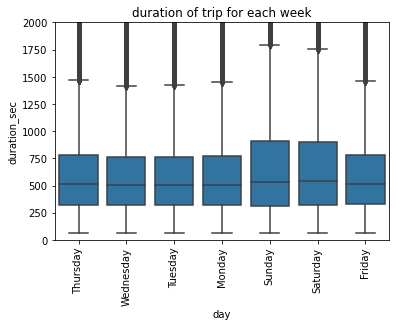

In [30]:
# making a boxplot to see the relation and distribution for trip duration and each day of the week
fig, ax = plt.subplots();
sns.boxplot(data=df_1,x='day',y='duration_sec',color=color_b)
plt.xticks(rotation=90);
plt.ylim(0,2000)
plt.title('duration of trip for each week');

#### intrestingly Saturday and Sunday has the heighst duration for trip although in lower duration they're the lowest as in holiday people go biking for entertainment or sport not for going work or school (which is usually will be near otherwise they'll use public transport :) )

Text(0.5, 1.0, 'relation for duration of trip and each gender')

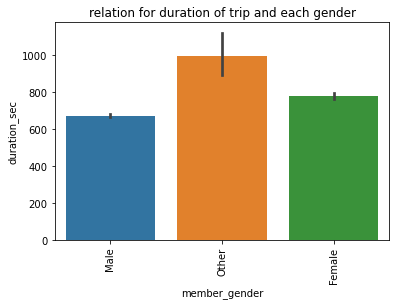

In [25]:
# making a bar plot to see the relation and distribution for trip duration and each Gender
fig, ax = plt.subplots();
sns.barplot(data=df_1,x='member_gender',y='duration_sec')
plt.xticks(rotation=90);
plt.title('relation for duration of trip and each gender')

#### interstingly male has the lowest duration for trip than female or others (males are lazier :) ) 

Text(0.5, 1.0, 'relation for duration of trip and each User Type')

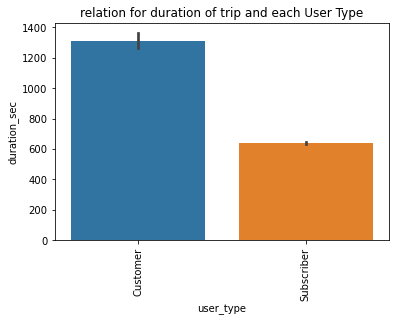

In [26]:
# making a bar to see the relation and distribution for trip duration and each user type
fig, ax = plt.subplots();
sns.barplot(data=df_1,x='user_type',y='duration_sec')
plt.xticks(rotation=90);
plt.title('relation for duration of trip and each User Type');

#### interstingly the customer has much more duration for trip than subscriber (which also indicate that subscriber usually person going to workplace rather than customer who just use it for sporting or entertainment

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Although male has much number of ride than female or other but they have the lowest duration which maybe that male use bike more for routine (going work or school) rather than use it for entertainment or sporting , also the day of the week show the same effect which indicate that the duration of ride increases more when riding the bike as a hobby rather than routine activities 



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

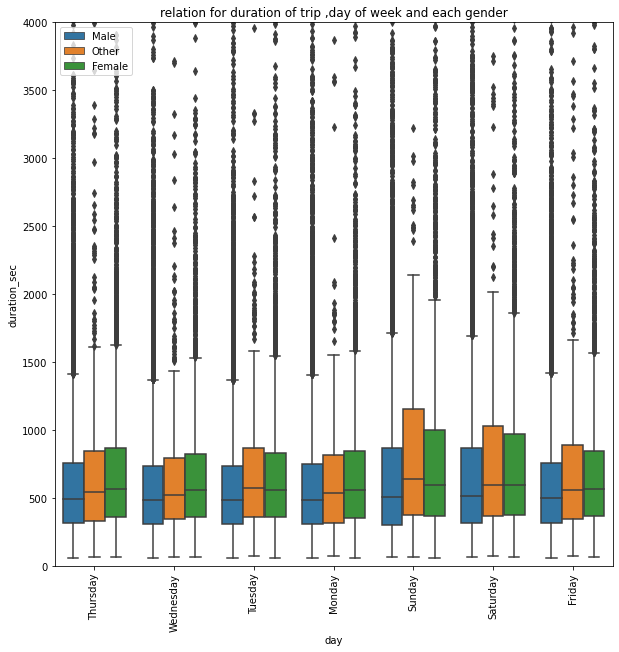

In [34]:
# making a violin plot to see the relation and distribution for trip duration day of week and each gender
fig, ax = plt.subplots(figsize=(10,10));
sns.boxplot(data=df_1,x='day',y='duration_sec',hue='member_gender')
plt.xticks(rotation=90);
plt.ylim(0,4000)
plt.title('relation for duration of trip ,day of week and each gender')
plt.legend();

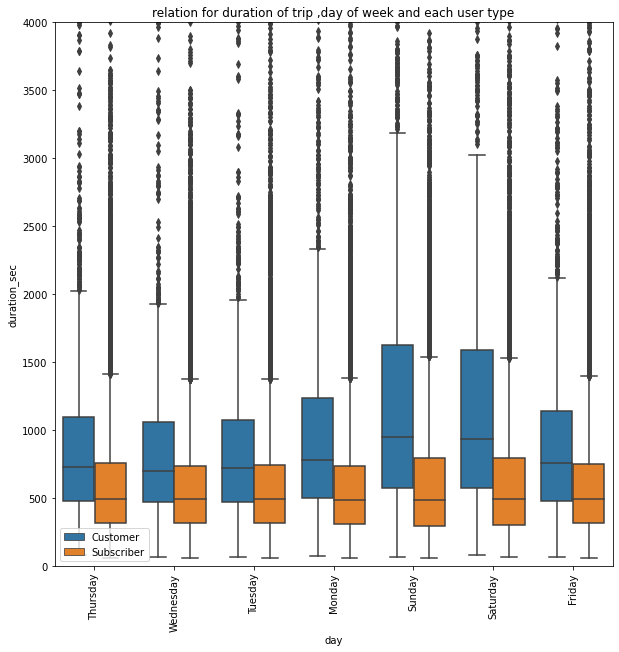

In [36]:
# making a violin plot to see the relation and distribution for trip duration day of week and each user type
fig, ax = plt.subplots(figsize=(10,10));
sns.boxplot(data=df_1,x='day',y='duration_sec',hue='user_type')
plt.xticks(rotation=90);
plt.title('relation for duration of trip ,day of week and each user type')
plt.ylim(0,4000)
plt.legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> from the 2 visualization we see that male are much more in the whole week but more from Monday to Friday while Female and others have much more trip in the weekend also we can see that the relaton between trip duration is more with others then Female then Male , the same thing is seen with relation between subscribers customers and trip duration although subscriber have much more trip than customers but customers tend to have much trip duration especially in the weekend

### Were there any interesting or surprising interactions between features?

> the intersting relationship -which further investigation by gathering more data for the whole year and many years- is that the reason why riding the bike affect the trip duration so if you you routinley ride bicycle your number of trip will increase but the duration of trip will be less 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!